##### We have been asked to use our hypothesis testing skills to answer the following questions:

- Q1. Do smokers have higher insurance charges than non-smokers?

- Q2. Are men more likely to smoke than women?

- Q3. Do different regions have different charges, on average?




#### For each question, make sure to:

State your Null Hypothesis and Alternative Hypothesis

Select the correct test according to the data type and number of samples

Test the assumptions of your selected test.

Execute the selected test, or the alternative test (if you do not meet the assumptions

Interpret your p-value and reject or fail to reject your null hypothesis 

Show a supporting visualization that helps display the result


# Import 

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv("K:\coding_DOJO\insurance - insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


# Explore data

In [3]:
# check duplicates
df.duplicated().sum()

1

In [4]:
# drop duplicates
df= df.drop_duplicates()
df.duplicated().sum()

0

In [5]:
# check missing values
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

# Q1. Do smokers have higher insurance charges than non-smokers?

In [6]:
smokers = df.loc[df['smoker'] == 'yes'].copy()
non_smokers = df.loc[df['smoker'] == 'no'].copy()

In [7]:
smokers.shape

(274, 7)

In [8]:
non_smokers.shape

(1063, 7)

 #### 1 - State your Null Hypothesis and Alternative Hypothesis

Null Hypothesis: there is no statistical difference in the charges of smokers and non-smokers patients
    
Alternative Hypothesis: smokers patients have higher insurance charges than non-smokers.  

#### 2 - Select the correct test according to the data type and number of samples

It is numeric and 2 samples (smokers and non-smokers), we will use 2 sample T-test 

#### 3 - Test the assumptions of your selected test.

#### outliers ( z > 3)

In [9]:
# check outliers with zscores 

# smokers
zscores_smokers = stats.zscore(smokers['charges'])
outliers_smokers = np.abs(zscores_smokers)>3
np.sum(outliers_smokers)

0

There are no outliers in our smokers data.

In [10]:
# non-smokers
zscore_no_smokers = stats.zscore(non_smokers['charges'])
outliers_no_smokers_3 = abs(zscore_no_smokers)>3
## how many outliers?
np.sum(outliers_no_smokers_3)

24

In [11]:
outliers_no_smokers = non_smokers[outliers_no_smokers_3]
outliers_no_smokers

,age,sex,bmi,children,smoker,region,charges
9,60,female,25.840,0,no,northwest,28923.13692
62,64,male,24.700,1,no,northwest,30166.61817
115,60,male,28.595,0,no,northeast,30259.99556
138,54,female,31.900,3,no,southeast,27322.73386
140,34,male,22.420,2,no,northeast,27375.90478
242,55,female,26.800,1,no,southwest,35160.13457
379,62,male,31.460,1,no,southeast,27000.98473
387,50,male,25.365,2,no,northwest,30284.64294
443,59,female,36.520,1,no,southeast,28287.89766
516,20,male,35.310,1,no,southeast,27724.28875


In [12]:
len(outliers_no_smokers)

24

Remove Outliers

In [20]:
# remove > 3 
non_smokers = non_smokers[~outliers_no_smokers_3]
len(non_smokers)

1039

The diference before and after remove is (1063 - 1039 = 24)

#### Normality

In [21]:
# checkc normality with stats.normaltes
# smokers
result_smokers = stats.normaltest(smokers['charges'])
print(result_smokers)
# is the p-value less than 0.05?
result_smokers.pvalue < .05

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)


True

In [22]:
result_non_smokers = stats.normaltest(non_smokers['charges'])
print(result_non_smokers)
# is the p-value less than 0.05?
result_non_smokers.pvalue < .05

NormaltestResult(statistic=163.70821423990097, pvalue=2.8262654970074626e-36)


True

Our p-values for both group are well below 0.05 which means our data is NOT normally distributed.  However, our our sample size is large enough to proceed without satisfying this test.

#### Equal Variance

In [23]:
# Test for equal variance
result_variance = stats.levene(smokers['charges'], non_smokers['charges'])
result_variance

LeveneResult(statistic=520.7178262969225, pvalue=2.512613039096279e-97)

We don't have equal variances, so we need to be sure to include "equal_var = False" when we perform our t-test.

#### 4 - Execute the selected test

In [24]:
# Independent t-test with equal_var set to False
result_1 = stats.ttest_ind(smokers['charges'], non_smokers['charges'], equal_var = False)
result_1

Ttest_indResult(statistic=33.723466247187815, pvalue=2.7282718648018296e-104)

#### 5 - Interpret your p-value and reject or fail to reject your null hypothesis 

p < 0.05 - reject null hypothesis, that means we support alternative hypothesis: smokers patients have higher insurance charges than non-smokers.

#### 6 - Show a supporting visualization that helps display the result

In [25]:
mean_smokers = smokers['charges'].mean()
mean_non_smokers = non_smokers['charges'].mean()

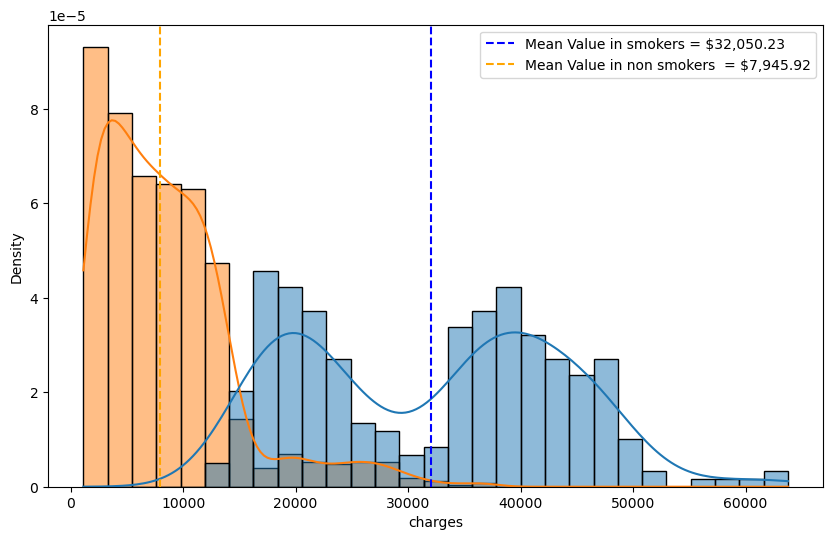

In [26]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df, x='charges', hue='smoker',common_norm=False, 
             stat='density',kde=True)
ax.axvline(mean_smokers,color='blue',ls='--', label = f"Mean Value in smokers = ${mean_smokers:,.2f}")
ax.axvline(mean_non_smokers,color='orange',ls='--', label = f"Mean Value in non smokers  = ${mean_non_smokers:,.2f}")
ax.legend()

The charge's mean in smokers (32,050.23) is higher than in non- smokers (7,945.92)

# - Q2. Are men more likely to smoke than women?

#### 1 - State your Null Hypothesis and Alternative Hypothesis

Null Hypothesis: the number of male and female smokers is not statistical different - there is no relation between sex and smokers. 

Alternative Hypothesis: the number of male smokers is higher than female smokers.

#### 2 - Select the correct test according to the data type and number of samples

It is categorical (female and male) and 2 samples (smokers and non-smokers), we will use Chi-Square

#### 3 - Test the assumptions of your selected test.

There are two categorical variables and the outcomes are independent (2 nominal - female and male)


#### 4 - Execute the selected test

In order to run the Chi-Squared Test, we need a contingency table.

In [27]:
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,516,159


In [28]:
# Run the Test and Save the Output
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result #this labels the results



In [29]:
result

(7.469139330086637,
 0.0062765550120107375,
 1,
 array([[526.33208676, 135.66791324],
        [536.66791324, 138.33208676]]))

In [30]:
print(p)
p< 0.05

0.0062765550120107375


True

#### 5 - Interpret your p-value and reject or fail to reject your null hypothesis

p < 0.05 - reject null hypothesis, the number of male smokers is statistically higher than female smokers.

#### 6 - Show a supporting visualization that helps display the result

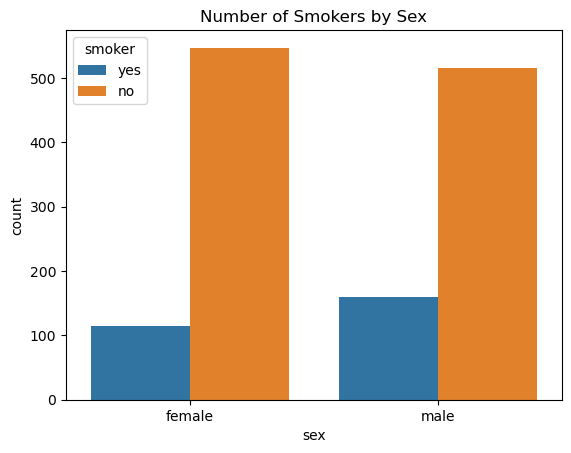

In [31]:
ax = sns.countplot(data=df, x='sex',hue='smoker',)
ax.set_title("Number of Smokers by Sex");



male smokers = 159 > female smokers = 115

# Q3. Do different regions have different charges, on average?

#### 1 - State your Null Hypothesis and Alternative Hypothesis
Null Hypothesis: there is no statistical difference in the charges's means between regions

Alternative Hypothesis: there is statistical difference in the charges's means  between regions

#### 2 - Select the correct test according to the data type and number of samples

In [32]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    324
northeast    324
Name: region, dtype: int64

Charge is a numeric data  and as we can see in value_count it has 4 region we will use ANOVA. 

#### 3 - Test the assumptions of your selected test.

Separating Our Groups

In [33]:
## Create groups dictionary. There are only 4 groups
groups = {}
## Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()



dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

#### Normality

In [34]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df


,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,324.0,6.502634e-24,106.779670
northeast,324.0,1.455431e-19,86.747629


In [35]:
### checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df



,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,324.0,6.502634e-24,106.779670,True
northeast,324.0,1.455431e-19,86.747629,True


Our p-values for all group are below 0.05 which means our data is NOT normally distributed. 
However, our our sample size is large enough (n>20) to proceed without satisfying this test.

#### Equal Variance

In [36]:
# with the * operator 
stats.levene(*groups.values())


LeveneResult(statistic=5.553479860699911, pvalue=0.0008689544824002284)

p<0.05 fail the assumption of equal variance we need select a non-parametric equivalent test - Kruskal-Wallis test

#### 4 - Execute the selected test

In [42]:
# Conduct the Kruskal-Wallis Test
result = stats.kruskal(*groups.values())
result

KruskalResult(statistic=4.622506584464645, pvalue=0.20161983372311595)

#### 5 - Interpret your p-value and reject or fail to reject your null hypothesis

p > 0.05 - fail to reject null hypothesis, there is no statistical difference in the charges's means between regions

#### 6 - Show a supporting visualization that helps display the result

<AxesSubplot: xlabel='charges', ylabel='Density'>

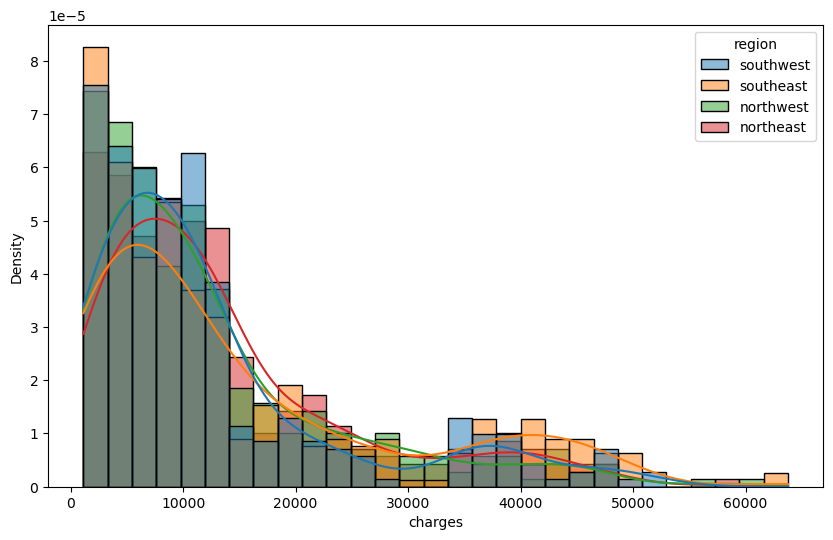

In [39]:
fig,ax = plt.subplots(figsize=(10,6))
sns.histplot(data=df, x='charges', hue='region',common_norm=False, 
             stat='density',kde=True)

In [40]:
df_group = df.groupby('region')['charges'].mean()
df_group

region
northeast    13406.384516
northwest    12450.840844
southeast    14735.411438
southwest    12346.937377
Name: charges, dtype: float64

<AxesSubplot: xlabel='region', ylabel='charges'>

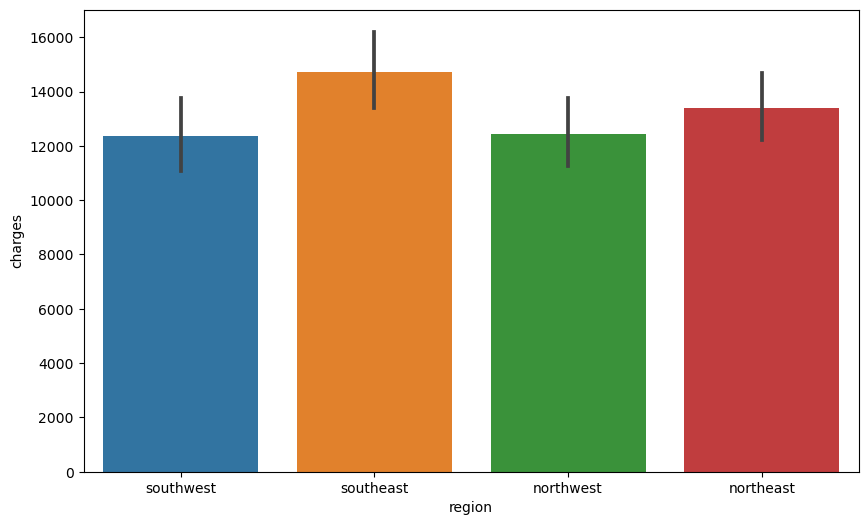

In [41]:
fig,ax = plt.subplots(figsize=(10,6))
sns.barplot(data=df, y='charges', x='region')